# Assignment on preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 1. Load the dataset into python environment
## 2. Make ‘PassengerId’ as the index column

In [2]:
df=pd.read_csv("/content/titanic_dataset.csv").set_index('PassengerId')
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 3. Check the basic details of the dataset

In [3]:
df.shape

(891, 11)

In [4]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


* Cabin has majority of values as NaN, it is better to exclude the column rather than to impute the value using mode. Which can create an imbalanced dataset.
* Columns Name and Ticket cannot be used to make a predictive model, as each row contains unique values

In [6]:
df1=df.copy()

In [7]:
df1.drop(['Cabin','Name','Ticket'],axis=1,inplace=True)

## 4. Fill in all the missing values present in all the columns in the dataset

In [8]:
df1.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

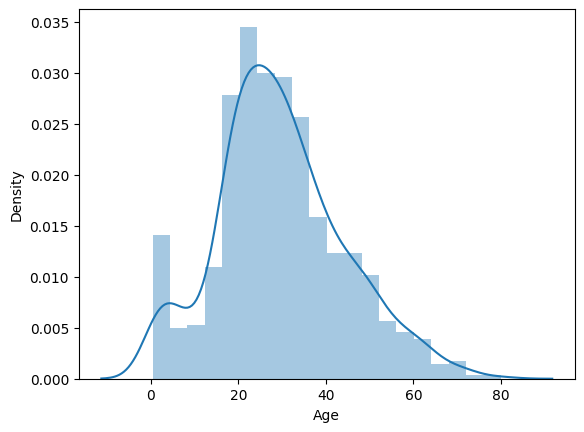

In [9]:
sns.distplot(df1['Age'])
plt.show()

In [10]:
df1['Age'].fillna(df1['Age'].mean(),inplace=True)

In [11]:
df1.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [12]:
df1['Embarked'].fillna(df1['Embarked'].value_counts().max,inplace=True)

In [13]:
df1.isna().sum().sum()

0

## 5. Check and handle outliers in at least 3 columns in the datase

In [14]:
df1.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C


The columns of Sibling Spouse and Parent Child can be replaced by accompanying family column.

In [15]:
df1['acc_family']=df1['SibSp']+df1['Parch']
df1.drop(['SibSp','Parch'],axis=1,inplace=True)

<Axes: ylabel='acc_family'>

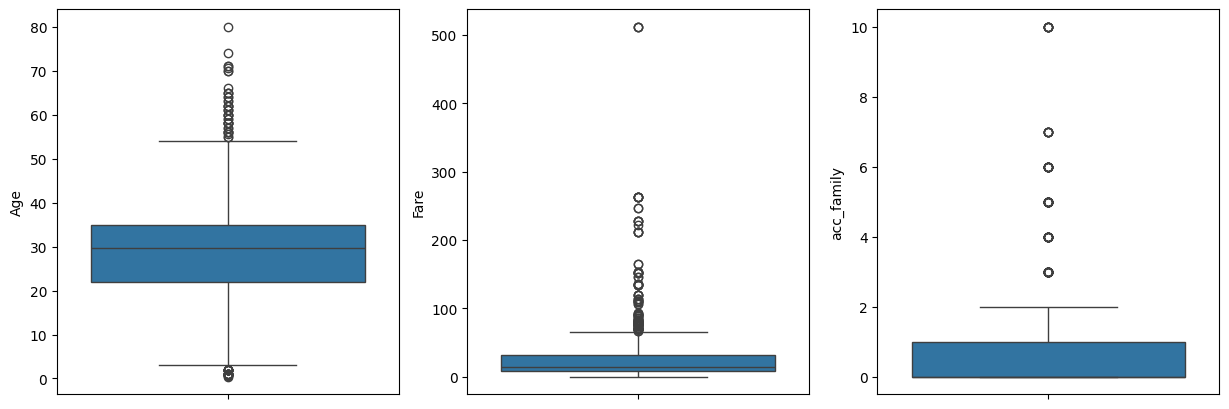

In [16]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(df1['Age'])

plt.subplot(1,3,2)
sns.boxplot(df1['Fare'])

plt.subplot(1,3,3)
sns.boxplot(df1['acc_family'])

### Removing Outliers

In [17]:
df2=df1.copy()
df2.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'acc_family'], dtype='object')

### Capping

In [18]:
cols=['Age','Fare','acc_family']
for i in cols:
  q1=df2[i].quantile(0.25)
  q3=df2[i].quantile(0.75)
  iqr=q3-q1
  ul=q3+1.5*iqr
  ll=q1-1.5*iqr
  df2[i]=np.where(df1[i]>ul,ul,np.where(df1[i]<ll,ll,df1[i]))


<Axes: ylabel='acc_family'>

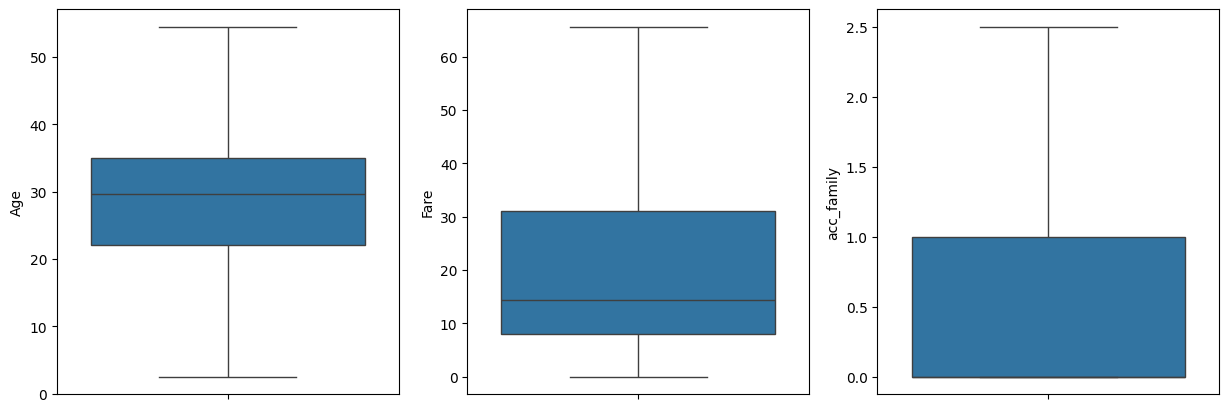

In [19]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(df2['Age'])

plt.subplot(1,3,2)
sns.boxplot(df2['Fare'])

plt.subplot(1,3,3)
sns.boxplot(df2['acc_family'])

## 6. Do min max scaling on the feature set (Take ‘Survived’ as target)


In [27]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler

col_transformer = make_column_transformer((OneHotEncoder(drop='first',sparse=False), [['Sex','Embarked']]),
 (MinMaxScaler(),[['Age','Fare','Pclass','acc_family']]),remainder='passthrough')

In [47]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()

df3=pd.get_dummies(df2[['Sex','Embarked']],drop_first=True)
df3.head(2)

,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,
1,1,0,0,1
2,0,1,0,0


In [54]:
data = pd.concat([df2,df3],1)
data.drop(data[['Sex','Embarked']],axis=1,inplace=True)
data.head(2)

,Survived,Pclass,Age,Fare,acc_family,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,
1,0,3,22.0,7.2500,1.0,1,0,0,1
2,1,1,38.0,65.6344,1.0,0,1,0,0


In [55]:
scalerX = MinMaxScaler(feature_range = (0,1))
data1 = scalerX.fit_transform(data)
data1=pd.DataFrame(data1,columns=data.columns)
data = pd.concat([df2,df3],1)

# Output Data

In [45]:
data1

,Survived,Pclass,Age,Fare,acc_family,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.0,1.0,0.375000,0.110460,0.4,1.0,0.0,0.0,1.0
1,1.0,0.0,0.682692,1.000000,0.4,0.0,1.0,0.0,0.0
2,1.0,1.0,0.451923,0.120745,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.625000,0.809027,0.4,0.0,0.0,0.0,1.0
4,0.0,1.0,0.625000,0.122649,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
886,0.0,0.5,0.471154,0.198067,0.0,1.0,0.0,0.0,1.0
887,1.0,0.0,0.317308,0.457077,0.0,0.0,0.0,0.0,1.0
888,0.0,1.0,0.523060,0.357282,1.0,0.0,0.0,0.0,1.0
889,1.0,0.0,0.451923,0.457077,0.0,1.0,1.0,0.0,0.0
